<a href="https://colab.research.google.com/github/Gabriel1Vitor/nuvem_de_palavras/blob/main/Nuvem_de_palavras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import tweepy
from PIL import Image
from wordcloud import WordCloud,STOPWORDS

Para acesar API do Twitter precisa de um cadastro

In [11]:
consumer_key='***************'
consumer_secret='********************'
access_token='**************'
access_token_secret='**************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [12]:
api = tweepy.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

'Não vejo uma saída satisfatória para o imbróglio em que o país enveredou', diz leitora https://t.co/3rhrmJ0srW
Mônica Bergamo: Estado de SP registra recorde de usuários de planos odontológicos em novembro https://t.co/hx8NGHMU5f
RT @UOLEconomia: Quer saber mais? A gente dá os detalhes na matéria! Vem conferir 👇

https://t.co/uu0XqQndvY
Morre Flávio Pentagna Guimarães, dono do BMG, aos 94 anos https://t.co/sx2xfugbqq
RT @UOLEconomia: 🛒 Saiba como se proteger ao fazer compras nas Americanas 👇 https://t.co/K2HE4ASg4j
RT @UOLEconomia: 🗣️ “Neste momento [de recuperação judicial], o que uma empresa mais precisa é respeitar o direito do consumidor. Tem que c…
Morre Flávio Pentagna Guimarães, dono do BMG, aos 94 anos https://t.co/5GxfI15sgw
RT @UOLEconomia: 🛒 Segundo o Idec, ainda não é preciso evitar fazer compras no site https://t.co/VLrhGAec40
RT @UOLEconomia: 💳 Ainda é seguro comprar nas Americanas após rombo de R$ 20 bilhões? https://t.co/mz2mBgMp0l
Jacinda sai do poder elogiada no exter

In [13]:
t=tweet._json.keys()
tweets_dict={}
tweets_dict=tweets_dict.fromkeys(t)

for tweet in public_tweets:
    for key in tweets_dict.keys():
      try:
          t=tweet._json[key]
          tweets_dict[key].append(t)
      except KeyError:
           t = ""
           tweets_dict[key].append("")
      except:
           tweets_dict[key] = [t]


data=pd.DataFrame.from_dict(tweets_dict)

Criação de um corpus e uma bolsa de palavras

In [15]:
palavras=" ".join(data["text"])
stop = STOPWORDS.union({"https","t","co","de","que","o","e","a","é","os","mai","ao","para","pra","se","tá","em","da","se","dos","q","na","da","ma",
                        "ou","por","pelo","sua","seu","essa","nas","esse","vmas","tem","mas","ter","nosso","nessa","á","ele","já","dele","aos","tgzorgmhbc",
                        "hoje4nzgt7avq0","c","rjtv sptv","qzh9lixph4"})

stop2=SnowballStemmer("portuguese")
d2=stop2.stem(palavras)

In [ ]:
imagem_mascara=np.array(Image.open("/content/drive/MyDrive/twitter-logo.png"))

Plot da nuvem de palavras

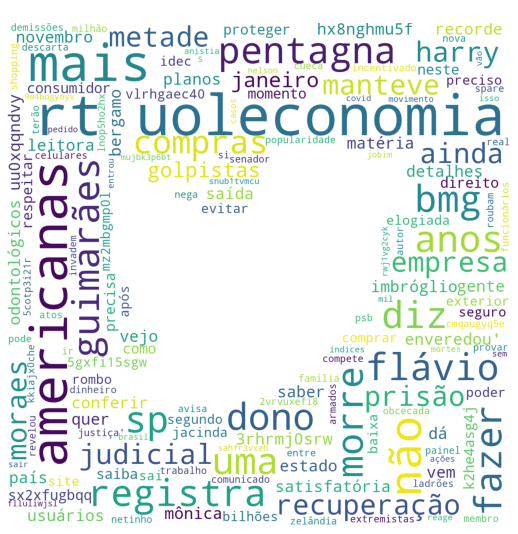

In [16]:
wordcloud=WordCloud(background_color="white",
                    stopwords=stop,
                    mask=imagem_mascara,
                    random_state=30
                    ).generate(d2)

pl.figure(figsize=(7,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title(" ")
plt.show()

Baixar a nuvem feita

In [ ]:
wordcloud.to_file("imagem.png")